MOVIES RECOMMENDATION

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
print(no_user_voted)
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
print(no_movies_voted)

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64
userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64


In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [ ]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df['Title']
    else:
        return "No movies found. Please check your input"

In [ ]:
x=get_movie_recommendation('Avengers')

In [ ]:
print(x)

1                                        Matilda (1996)
2                                  Haunting, The (1999)
3                                 Mercury Rising (1998)
4                        Speed 2: Cruise Control (1997)
5                                 Reindeer Games (2000)
6                                     Snake Eyes (1998)
7     William Shakespeare's A Midsummer Night's Drea...
8                                       Anaconda (1997)
9                                      Edge, The (1997)
10                                        Sphere (1998)
Name: Title, dtype: object


In [ ]:
x.map(str)

1                                    Barton Fink (1991)
2                            Intolerable Cruelty (2003)
3                    Big Trouble in Little China (1986)
4                      Man Who Wasn't There, The (2001)
5                  Twin Peaks: Fire Walk with Me (1992)
6                            Lost in Translation (2003)
7                                       WarGames (1983)
8                       Witches of Eastwick, The (1987)
9     Master and Commander: The Far Side of the Worl...
10               Crocodile Dundee in Los Angeles (2001)
Name: Title, dtype: object

Books Recommenadtion

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Reading the data
df = pd.read_excel("data.xlsx")
df.to_csv ("Test.csv", index = None,header=True)
df = pd.DataFrame(pd.read_csv("Test.csv"))

In [ ]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [ ]:
df['Desc'] = df['Desc'].astype(str)

In [ ]:
df['cleaned'] = df['Desc'].apply(_removeNonAscii)

df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)

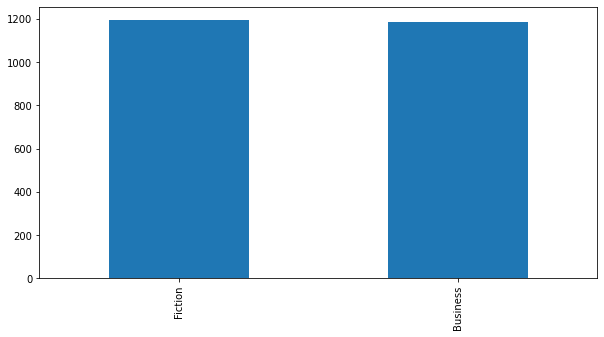

In [ ]:

df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [ ]:
!pip install -U git+https://github.com/sloria/TextBlob.git@dev

  Cloning https://github.com/sloria/TextBlob.git (to revision dev) to /tmp/pip-req-build-dt9olo3m
  Running command git clone -q https://github.com/sloria/TextBlob.git /tmp/pip-req-build-dt9olo3m
  Created wheel for textblob: filename=textblob-0.17.1-py2.py3-none-any.whl size=636763 sha256=1785211963095d71dcdc72ef96d9ef1ab5e19c210901f6960b31eeaf9d5b508c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qpndgznk/wheels/7a/1e/a0/7d296388d9cfc59ab7fb1f42ada18376c1bf0245615b736b36
Successfully built textblob
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacytextblob 4.0.0 requires textblob<0.16.0,>=0.15.3, but you have textblob 0.17.1 which is incompatible.


In [ ]:
!pip install spacytextblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1


In [ ]:
%%bash
python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


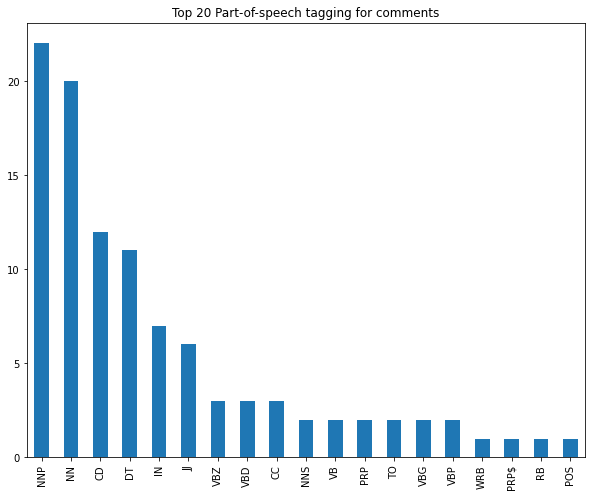

In [ ]:
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

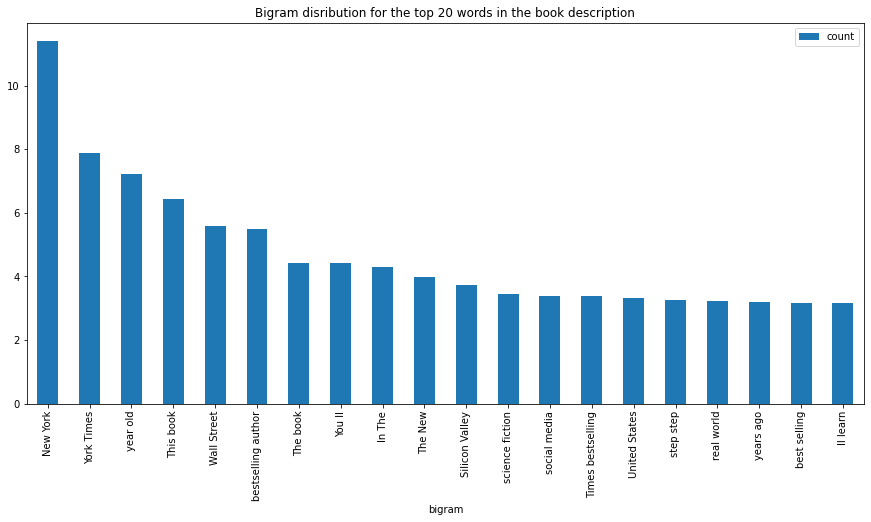

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

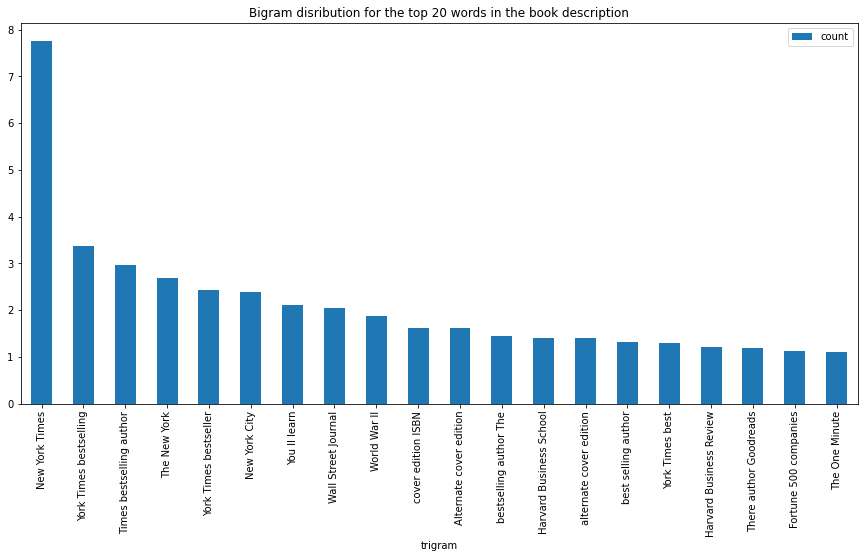

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True)
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [ ]:
  # Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
  # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]
    data.reset_index(level = 0, inplace = True)

    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])

    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])

    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to original_title

    idx = indices[title]# Get the pairwsie similarity scores
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books
    sig = sig[1:6]# Book indicies
    movie_indices = [i[0] for i in sig]

    # Top 5 book recommendation
    rec = data[['title', 'image_link']].iloc[movie_indices]
    return str(rec['title']);

In [ ]:
st=recommend("Pride and Prejudice", "Fiction") #Harry Potter and the Deathly Hallows,Fiction

In [ ]:
st

'601                      Pride and Prejudice and Zombies\n865    Eligible : A Modern Retelling of Pride & Preju...\n0                                  To Kill a Mockingbird\n1                                                   1984\n2                                       The Great Gatsby\nName: title, dtype: object'

SONG RECOMMMENDATION

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.007s...
[t-SNE] Computed neighbors for 2973 samples in 0.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.112457


No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/telegram/ext/dispatcher.py", line 555, in process_update
    handler.handle_update(update, self, check, context)
  File "/usr/local/lib/python3.7/dist-packages/telegram/ext/handler.py", line 198, in handle_update
    return self.callback(update, context)
  File "<ipython-input-51-437a5b851948>", line 65, in unknown_text
    if s:
UnboundLocalError: local variable 's' referenced before assignment


[t-SNE] KL divergence after 1000 iterations: 1.395118


In [ ]:
!pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
recommend_songs([{'name': 'Come As You Are', 'year':1991}],  data)

[{'artists': "['Linkin Park']", 'name': 'In the End', 'year': 2000},
 {'artists': "['Fuel']", 'name': 'Shimmer', 'year': 1997},
 {'artists': "['Megadeth']", 'name': 'Symphony Of Destruction', 'year': 1992},
 {'artists': "['TV Girl']", 'name': 'Lovers Rock', 'year': 2014},
 {'artists': "['Linkin Park']", 'name': 'Breaking the Habit', 'year': 2003},
 {'artists': "['Linkin Park']", 'name': 'New Divide', 'year': 2009},
 {'artists': "['Ted Nugent']", 'name': 'Cat Scratch Fever', 'year': 1977},
 {'artists': "['Soundgarden']", 'name': 'Fell On Black Days', 'year': 1994},
 {'artists': "['The Marshall Tucker Band']",
  'name': 'Fire on the Mountain',
  'year': 1975}]

In [ ]:
def lts(d):
    p=""
    for i in range(len(d)):
        p=p+listToString(d[i]["artists"])+str(d[i]["name"])+str(d[i]["year"])+"\n"
        # for j in d[i].keys():
        #     p=p+str(d[i][j])
        # p=p+"\n"
    return p

In [ ]:
def listToString(s):

    # initialize an empty string
    str1 = ""

    # traverse in the string
    for ele in s:
        str1 += (ele)

    # return string
    return str1


In [ ]:
lts(recommend_songs([{'name': 'Come As You Are', 'year':1991}],  data))

"['Linkin Park']In the End2000\n['Fuel']Shimmer1997\n['Megadeth']Symphony Of Destruction1992\n['TV Girl']Lovers Rock2014\n['Linkin Park']Breaking the Habit2003\n['Linkin Park']New Divide2009\n['Ted Nugent']Cat Scratch Fever1977\n['Soundgarden']Fell On Black Days1994\n['The Marshall Tucker Band']Fire on the Mountain1975\n"

CHATBOT

In [ ]:
pip install python-telegram-bot

In [ ]:
from telegram.ext.updater import Updater
from telegram.update import Update
from telegram.ext.callbackcontext import CallbackContext
from telegram.ext.commandhandler import CommandHandler
from telegram.ext.messagehandler import MessageHandler
from telegram.ext.filters import Filters

m=False
b=False
s=False
updater = Updater("5127631642:AAGOM_ecT1bqvo4Mc_x4YbL1dRSNCY67eik",
                use_context=True)


def start(update: Update, context: CallbackContext):
    global m,s,b
    update.message.reply_text(
        "Hello , Welcome to Recbot. Do you want recommendation?")
    m=False
    s=False
    b=False
    #update.message.reply_text('m'+str(m)+'b'+str(b)+'s'+str(s))

def help(update: Update, context: CallbackContext):
    update.message.reply_text("""Alright Please enter your domain :-
    /movies - To get movies recommendation
    /books - To get books recommendation
    /songs - To get songs recommendation""")
def next_step(update: Update, context: CallbackContext):
    update.message.reply_text(
        "Please enter your previous watched movie.")
def movie(update: Update, context: CallbackContext):
    global m
    m=True
    update.message.reply_text(
        "Please enter your previous watched movie.")


def book(update: Update, context: CallbackContext):
    global b
    b = True
    update.message.reply_text("Please enter your previous book read.")


def song(update: Update, context: CallbackContext):
    global s
    s=True
    update.message.reply_text(
        "Please enter your previous listened song.")

def inlinequery(update, context):
 query = update.inline_query.query
 text = query.message_text
 print(text)
 update.message.reply_text(text)

def unknown(update: Update, context: CallbackContext):
    update.message.reply_text(
        "Sorry '%s' is not a valid command" % update.message.text)

    # update.message.reply_text(
    #   "Sorry I can't recognize you , you said '%s'" % update.message.text)

def unknown_text(update: Update, context: CallbackContext):
    if s:
        x = update.message.text
        res = x.split(',')
        t = recommend_songs([{'name': res[0], 'year':int(res[1])}],  data)
        s=False
        update.message.reply_text(lts(t))
    if b:
        x = update.message.text
        res = x.split(',')
        t = recommend(res[0],res[1])
        b=False
        update.message.reply_text(str(t)[:-1])
    if m:
        m=False
        t=get_movie_recommendation(update.message.text)
        update.message.reply_text(t.to_string(index=False))


updater.dispatcher.add_handler(CommandHandler('start', start))
updater.dispatcher.add_handler(CommandHandler('yes',help))
updater.dispatcher.add_handler(CommandHandler('movies',movie))
updater.dispatcher.add_handler(CommandHandler('books',book))
updater.dispatcher.add_handler(CommandHandler('songs',song))
#updater.dispatcher.add_handler(CommandHandler(reply))

updater.dispatcher.add_handler(MessageHandler(Filters.text, unknown_text))
updater.dispatcher.add_handler(MessageHandler(Filters.command, unknown)) # Filters out unknown commands

updater.start_polling()